In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_iris
import numpy as np

% matplotlib inline 

In [9]:
data=load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
import pandas as pd 

In [10]:
df=pd.DataFrame(data=data['data'],columns=data['feature_names'])

<Axes: >

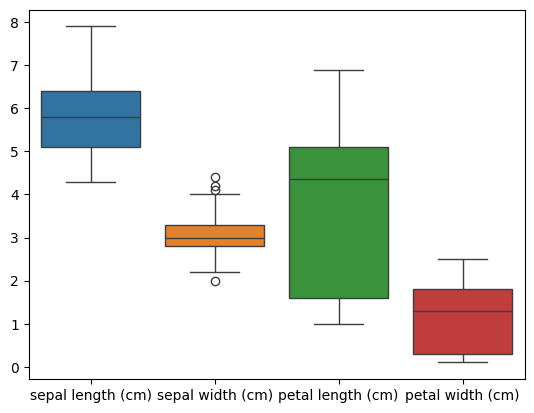

In [13]:
sns.boxplot(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<Axes: >

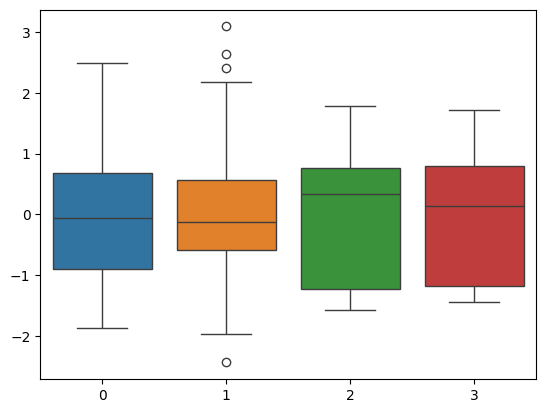

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(df)
sns.boxplot(x)


In [20]:
data['target_names'],data['target']

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [45]:
yy=pd.DataFrame(data=data['target'],columns=['target'])
yy['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [37]:
y=data['target']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Q1 We have 2 lists (year and gdp ). Create a line plot proper labels and title to the figure 

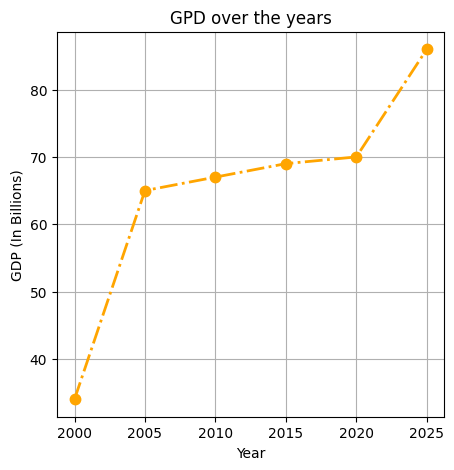

In [67]:
plt.figure(figsize=(5,5))
gdp=[34,65,67,69,70,86]
year=[2000,2005,2010,2015,2020,2025]
plt.plot(year,gdp,marker=".",ms=15,color="orange",ls="-.",lw=2)
plt.xlabel("Year")
plt.ylabel("GDP (In Billions)")
plt.title("GPD over the years")
plt.grid()
plt.show()

In [69]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,f1_score,recall_score,accuracy_score

models={"DecisionTreeClassifier":DecisionTreeClassifier()
        ,"Random Forest Classifier":RandomForestClassifier,"Adaboost Classifier":AdaBoostClassifier(),
        "KNeighbour Classifier":KNeighborsClassifier()}

for model_name in models.keys():
    model=models[model_name]

    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)

    ## Scores 
    # roc_auc_score=roc_auc_score(y_test,y_pred_proba[:,1])
    f1_score=f1_score(y_test,y_pred,average='macro')
    recall_score=recall_score(y_test,y_pred,average='macro')
    accuracy_score=accuracy_score(y_test,y_pred)

    print("==========================================================")
    print(f"                   {model_name} Scores :      ")
    print(f"-accuracy score : {accuracy_score}")
    print(f"-f1 score : {f1_score}")
    print(f"-recall_score: {recall_score}")
    # print(f"-roc auc score : {roc_auc_score}")


                   DecisionTreeClassifier Scores :      
-accuracy score : 1.0
-f1 score : 1.0
-recall_score: 1.0


AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

([<matplotlib.patches.Wedge at 0x1c462604190>,
 [Text(0.5999999697158604, 1.039230502025882, 'setosa'),
  Text(-1.1999999999999955, -1.049073360044697e-07, 'versicolor'),
  Text(0.6000003991925079, -1.0392302540673224, 'virginica')],
 [Text(0.3499999823342519, 0.6062177928484311, '33.33%'),
  Text(-0.6999999999999974, -6.119594600260732e-08, '33.33%'),
  Text(0.3500002328622962, -0.6062176482059379, '33.33%')])

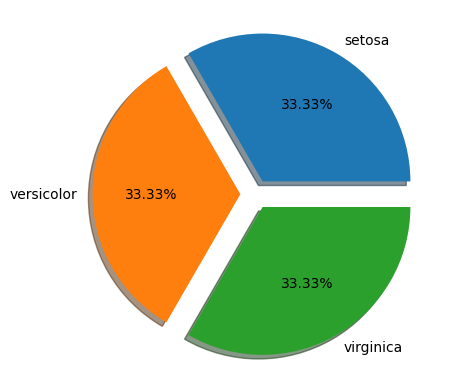

In [52]:
plt.pie(yy.value_counts(),autopct="%2.2f%%",labels=data['target_names'],shadow=True,explode=[0.1,0.1,0.1])

## A data about 13 cars is given 

In [92]:
from sklearn.datasets import make_moons
xx,yx=make_moons(n_samples=1000,noise=0.1)

<Axes: >

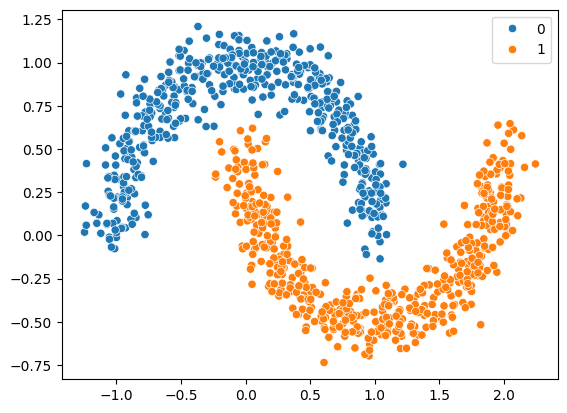

In [93]:
sns.scatterplot(x=xx[:,0],y=xx[:,1],hue=yx)

In [94]:
from sklearn.datasets import make_s_curve
xxx,yyy=make_s_curve(n_samples=1000,noise=0.1)

In [95]:
xxx

array([[-0.24083001,  1.839356  , -0.04423412],
       [ 0.40348574,  1.91390131,  1.87017365],
       [-0.48594337,  1.72597134, -1.76091528],
       ...,
       [-0.00759136,  1.90743149, -0.08916056],
       [ 0.65178001,  0.28889248, -0.44410197],
       [-0.54607748,  0.33728237,  0.21123937]], shape=(1000, 3))

<Axes: >

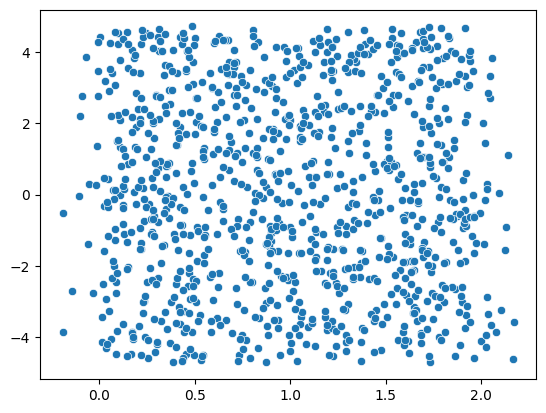

In [97]:
sns.scatterplot(x=xxx[:,1],y=yyy)

In [98]:
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

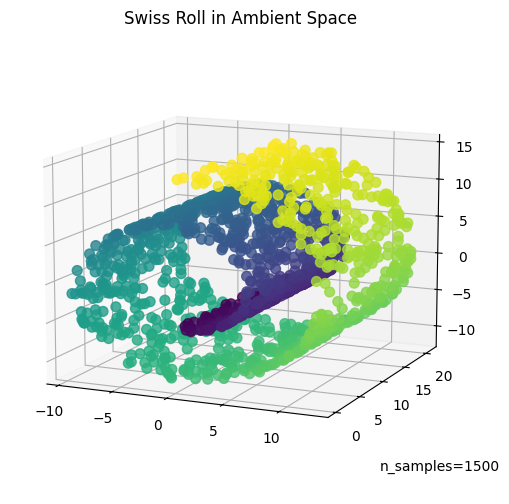

In [99]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)